# DSA Algorithm for Approximating Solutions to the Neutron Transport Equation

### Problem Description

* Many advancements in nuclear physics depend on accurately modelling the neutron distribution in a reactor. The main equation used in such models is the **neutron transport equation**, which has this form in 3+1 dimensions (3 space dimensions and 1 time dimension):

  $$
  \begin{align}
  \frac{1}{v(E)} \frac{\partial}{\partial t} \psi(\mathbf{r}, \Omega, E, t) &+ \Omega \cdot \nabla \psi(\mathbf{r}, \Omega, E, t) + \sigma_T(\mathbf{r}, E) \psi(\mathbf{r}, \Omega, E, t) = \\
  &\int_{R^+} \int_{S^2} \sigma_s(\mathbf{r}, \Omega' \cdot \Omega, E', E) \psi(\mathbf{r}, \Omega', E', t) d\Omega' dE' \\
  &+ \frac{\chi(E)}{4\pi} \int_{R^+} \nu(\mathbf{r}, E') \sigma_f(\mathbf{r}, E') \left(\int_{S^2} \psi(\mathbf{r}, \Omega', E', t) d\Omega'\right) dE' \\
  &+ Q(\mathbf{r}, \Omega, E, t)
  \end{align}
  $$

  This describes how the neutron $\psi$ varies in time. The second term represents the rate of change of neutrons in the space and the energy due to the motion of neutrons in a straight line without any collisions. The third term represents the loss of neutrons that undergo collisions. The right-hand side has different source terms.
<br>

* This equation looks (and is indeed) quite complicated and is usually simplified for various models. A specific simplification for the **steady-state neutron transport equation in the "slab geometry" (1D)** is considered below. The equation can be written as:

  $$
  \mu \frac{\partial}{\partial x} \psi(x, \mu) + \sigma_T(x) \psi(x, \mu) = \frac{\sigma_s(x)}{2} \int_{-1}^{1} \psi(x, \mu) d\mu + Q(x) \quad (1)
  $$

  Here, we're considering the neutron flux $\psi(x, \mu)$ in the "slab geometry": $x$ is the spacial variable lying in a bounded domain $[x_L, x_R]$, and $\mu$ is the angular variable $(\mu \in [-1, 1]$, which corresponds to $\theta \in [0, \pi]$ for $\mu=cos(\theta))$. $Q(x)$ represents an isotropic (independent of the angle) neutron source. The remaining functions represent corss-sections: $\sigma_S(x)$ is the scattering cross-section, $\sigma_A(x)$ is the absorption cross-section, and $\sigma_T(x)$ is the total cross-section: $\sigma_T(x) = \sigma_S(x) + \sigma_A(x)$ for any $x$ in our domain. There is no energy term because we are only considering one energy group.

  The boundary conditions for this integro-differential equation are:
  $$
  \begin{align}
  \psi(x_L, \mu) &= f_L(\mu), \quad \text{when } \mu > 0 \quad (2.1), \\
  \psi(x_R, \mu) &= f_R(\mu), \quad \text{when } \mu < 0 \quad (2.2)
  \end{align}
  $$

  For convenience later, let us also define the operators $T$ and $P$ in the following way:
  $$
  T\psi(x, \mu) \equiv \mu \frac{\partial}{\partial x}\psi(x, \mu) + \sigma_T(x)\psi(x, \mu).
  $$

  $$
  P\psi(x, \mu) = \frac{1}{2}\int_{-1}^{1}\psi(x, \mu) d\mu.
  $$
<br>

* This PDE can be approximated by the scalar flux $\phi(x)$ through the Diffusion Synthetic Acceleration algorithm (Blake 2016). This method is not very accurate close to the boundaries, but should give a good approximation for the neutron flux in the interior of the domain.

  **Diffusion Synthetic Acceleration**:
  1. Start with some initial $\phi^{(0)}(x)$
 
  2. Find $\phi^{(k+\frac{1}{2})}(x)$ that satisfies
  $$
  \phi^{(k+\frac{1}{2})}(x) = PT^{-1} \left( \sigma_s(x)\phi^{(k)}(x) + Q(x) \right),
  $$
  subject to boundary conditions $(2.1)$, $(2.2)$

  3. Find $\delta^{(k+\frac{1}{2})}(x)$ that satisfies
  $$
  -\frac{d}{dx} \left( \frac{1}{3\sigma_T(x)} \frac{d}{dx} \delta^{(k+\frac{1}{2})}(x) \right) + \sigma_A(x)\delta^{(k+\frac{1}{2})}(x) = \sigma_s(x) \left( \phi^{(k+\frac{1}{2})}(x) - \phi^{(k)}(x) \right),
  $$
  subject to
  $$
  \delta^{(k+\frac{1}{2})}(x_L) - \frac{\gamma^1}{\sigma_T(x_L)} \frac{d}{dx} \delta^{(k+\frac{1}{2})}(x_L) = 0,
  $$
  $$
  \delta^{(k+\frac{1}{2})}(x_R) + \frac{\gamma^1}{\sigma_T(x_R)} \frac{d}{dx} \delta^{(k+\frac{1}{2})}(x_R) = 0.
  $$
  4. Update the scalar flux approximation to find
  $$
  \phi^{(k+1)}(x) = \phi^{(k+\frac{1}{2})}(x) + \delta^{(k+\frac{1}{2})}(x),
  $$
  and return to step 2.
<br>

* In this project, we will investigate **how the variation of the cross section terms $(\sigma_S(x)$, $\sigma_A(x)$, $\sigma_T(x))$ affects the behaviour of the DSA algorithm**. We will use the same source term $Q(x) = sin(2\pi x)$, which respects the steady state condition, and zero boundary conditions. The **DSA output will be compared to 2 simpler approximations of the 1D transport equation**: the simplification of the 1D transport equation under the assumption that $\psi(x, \mu)$ doesn't depend on $\mu$ and the steady-state diffusion equation.

  * Simplification of the 1D Transport Equation

    Assuming $\psi(x, \mu)$ doesn't depend on $\mu$ and the cross section terms are constants, our initial transport equation $(1)$ can be rewritten in the following way:
    $$
    \mu \frac{d\psi(x)}{d x} + \sigma_T \psi(x) = \frac{\sigma_S}{2} \int_{-1}^{1} \psi(x) d\mu + Q(x) \quad
    $$
    Integrating over the domain of $\mu$, we get $\psi(x) = \frac{Q(x)}{\sigma_T - \sigma_S} = \frac{Q(x)}{\sigma_A}$

    For $Q(x)=sin(2\pi x)$, $\psi(x) = \frac{sin(2\pi x)}{\sigma_A}$

  * Steady-State Diffusion Equation

    Assuming the cross section terms are constant, the steady-state difussion equation takes the following form:
    $$
    \frac{1}{3\sigma_S} \frac{d^2 \phi(x)}{d x^2} - \sigma_A \phi(x) + Q(x) = 0
    $$
    Imposing zero boundary conditions and $Q(x)=sin(2\pi x)$, we get $\phi(x) = \frac{3 \sigma_S sin(2\pi x)}{4\pi^2 + 3\sigma_S\sigma_A}$

### Computational Methods

* The DSA algorithm has 2 main components to it: an IVP solver (in terms of $x$) for every value of $\mu$ in step 2 and a BVP solver (in terms of $x$) in step 3 for the correction. `solve_ivp` and `solve_bvp` from the `scipy` package are used together with tailored functions that transform the desired problem to the format compatible with the routines. 

* In step 2, the direction of integration is reversed for negative $\mu$ because of the given boundary conditions.

* Step 3 involves solving a second-order equation, which is transformed to a system of first-order equations, compatible with `solve_bvp`.

* Cubic spline interpolation is used in both step 2 and step 3 to interpolate the arrays passed on to the solver as parameters.

### Implementation

In [2]:
%matplotlib inline
%precision 16
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import solve_bvp as scipy_solve_bvp
from scipy.interpolate import CubicSpline

Absolute error values in the DSA algorithm :
The algorithm converged with the desired tolerance: 1e-06 for sigma_s=0.95
[2.4023362444515346, 0.38265787242775184, 0.06114024087032029, 0.009774455980664776, 0.0015629672862164355, 0.0002499477655627924, 3.997319112323642e-05, 6.392911135162796e-06, 1.0224030767515155e-06, 1.637608719443803e-07]
The algorithm converged with the desired tolerance: 1e-06 for sigma_s=0.5
[2.2120084609682693, 0.17118599599400564, 0.01329970422111038, 0.0010342096666034256, 8.04521345742826e-05, 6.259611716897157e-06, 4.870580137702199e-07]
The algorithm converged with the desired tolerance: 1e-06 for sigma_s=0.005
[2.0365078686538785, 0.001456152058141919, 1.0466507491367361e-06, 7.534565476862566e-10]


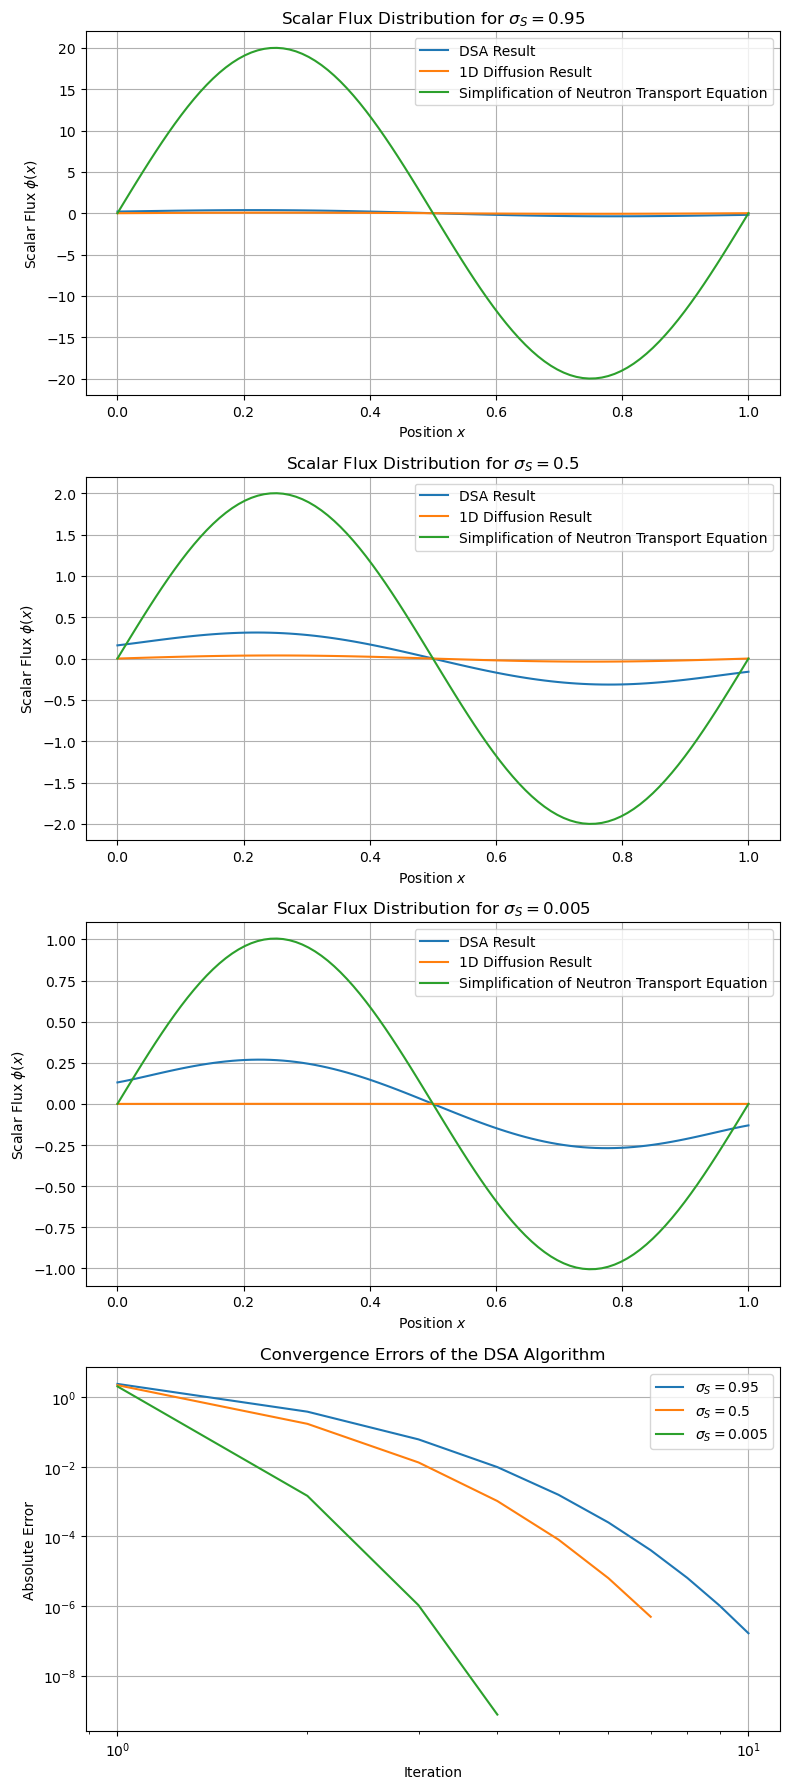

In [3]:
# ODE solver for step 2 of the DSA algorithm
def solve_ode(mu, sigma_s, sigma_t, Q, f_L, f_R, x_L, x_R, phi_k, x_domain):
    # Create a spline object from phi_k and x_domain
    spline_phi_k = CubicSpline(x_domain, phi_k)
    # Define the ODE to be solved for a given mu
    def ode_func(x, phi_solving):
        # Use the spline object to interpolate phi_k at x
        phi_k_interp = spline_phi_k(x)
        return (-sigma_t * phi_solving + sigma_s * phi_k_interp + Q(x)) / mu

    if mu > 0:
        x_span = (x_L, x_R)  # Integrate from left to right
        phi_0 = [f_L]
    else:
        x_span = (x_R, x_L)  # Integrate from right to left
        phi_0 = [f_R]

    # Solve the ODE
    sol = solve_ivp(ode_func, x_span, phi_0, rtol=1e-12, atol=1e-12)

    # Interpolate the solution back onto the x_domain
    # If mu > 0, interpolate directly; if mu < 0, reverse sol.t and sol.y[0] before interpolating
    if mu > 0:
        t_eval = sol.t
        y_eval = sol.y[0]
    else:
        t_eval = sol.t[::-1]
        y_eval = sol.y[0][::-1]

    # Creating a spline for the solution interpolation
    solution_spline = CubicSpline(t_eval, y_eval)
    phi_solved = solution_spline(x_domain)
    return phi_solved


# BVP solver for step 3 of the DSA algorithm
def custom_solve_bvp(x_domain, sigma_s, sigma_a, sigma_t, phi_half_k, phi_k):
    # Create spline objects for interpolation
    spline_phi_k = CubicSpline(x_domain, phi_k)
    spline_phi_half_k = CubicSpline(x_domain, phi_half_k)
    # Define the BVP system of equations
    def bvp_ode(x, y):
        # y[0] = delta, y[1] = nabla
        phi_k_interp = spline_phi_k(x)
        phi_half_k_interp = spline_phi_half_k(x)
        source_term = 3 * sigma_t * (-sigma_s * (phi_half_k_interp - phi_k_interp) + sigma_a * y[0])
        return np.array([y[1], source_term])  # Corresponding to d delta/dx = nabla, d nabla/dx = source term

    def bvp_bc(ya, yb):
        # Boundary conditions for delta and nabla at the boundaries of the domain
        # ya[0] = delta(x_L), ya[1] = nabla(x_L)
        # yb[0] = delta(x_R), yb[1] = nabla(x_R)
        gamma_L = gamma_R = 0.710446
        return np.array([
            ya[0] - gamma_L / sigma_t * ya[1],  # BC at x_L
            yb[0] + gamma_R / sigma_t * yb[1]  # BC at x_R
        ])

    # Initial guess for y (solution), where y[0] = delta, y[1] = nabla
    y_guess = np.zeros((2, len(x_domain)))

    # Using SciPy's solve_bvp
    sol = scipy_solve_bvp(bvp_ode, bvp_bc, x_domain, y_guess, tol=1e-12)
    return sol.sol(x_domain)[0]  # Returning delta(x) over the x_domain

# Now, we define the iterative process for the DSA algorithm
def DSA_algorithm(phi_initial, iterations=5, tol=1e-9):
    phi_k = phi_initial.copy()
    errors = []
    for k in range(iterations):
        phi_half_k = np.zeros_like(phi_k)
        delta_half_k = np.zeros_like(phi_k)
        # Step 2: Solve the ODE for each mu
        for mu in mu_domain:
            phi_half_k += solve_ode(mu, sigma_s, sigma_t, Q, f_L, f_R, x_L, x_R, phi_k, x_domain)

        # Average over mu
        phi_half_k /= mu_domain.size

        # Step 3: Solve the BVP
        delta_half_k = custom_solve_bvp(x_domain, sigma_s, sigma_a, sigma_t, phi_half_k, phi_k)

        # Step 4: Update the scalar flux approximation
        phi_k_plus_1 = phi_half_k + delta_half_k

        # Add the relative error to the errors array
        norm_diff = np.linalg.norm(phi_k_plus_1 - phi_k)
        errors.append(norm_diff)

        if norm_diff != 0 and norm_diff < tol: # We want real convergence, not just repeating the initial guess
            print(f"The algorithm converged with the desired tolerance: {tol} for sigma_s={sigma_s}")
            break

        # Prepare for the next iteration
        phi_k = phi_k_plus_1

    print(errors)
    return phi_k, errors


# Now that we have defined all the functions, we can define the parameters

# Constants and domains
x_L, x_R = 0, 1  # Domain for x
mu_domain = np.linspace(-1, 1, 100)  # Discretized mu domain
x_domain = np.linspace(x_L, x_R, 100)  # Discretized x domain

# Initial guess for phi
phi_initial = np.zeros(len(x_domain))

# Boundary conditions for step 2 (zero flux at the boundary)
f_L = 0
f_R = 0

# Source term that respects the steady-state condition: there is no accumulation of neutrons
Q = lambda x: np.sin(2 * np.pi * x)

# Parameters: cross-sections
sigma_s_array = [0.95, 0.5, 0.005]  # Scattering cross section
sigma_a_array = [0.05, 0.5, 0.995]  # Absorption cross section
sigma_t = 1  # Total cross section (always 1 in our case as the sum of the scattering and the absorption cross sections)

fig, (ax_flux_0, ax_flux_1, ax_flux_2, ax_error) = plt.subplots(4, 1, figsize=(8, 18))  # Arrangement for plotting flux and errors
axes_flux = [ax_flux_0, ax_flux_1, ax_flux_2]

print('Absolute error values in the DSA algorithm :')
for i in range(len(sigma_s_array)):
    sigma_s = sigma_s_array[i]
    sigma_a = sigma_a_array[i]
    phi_approximation, errors = DSA_algorithm(phi_initial, iterations=10, tol=1e-6)
    axes_flux[i].plot(x_domain, phi_approximation, label='DSA Result'.format(sigma_s))
    axes_flux[i].plot(x_domain, 3*sigma_s*Q(x_domain) / (4*np.pi**2 + 3*sigma_a*sigma_s), label='1D Diffusion Result'.format(sigma_s))
    axes_flux[i].plot(x_domain, Q(x_domain) / sigma_a, label='Simplification of Neutron Transport Equation'.format(sigma_s))
    ax_error.loglog(range(1, len(errors) + 1), errors, label=r'$\sigma_S={}$'.format(sigma_s))

ax_flux_0.set_title(r'Scalar Flux Distribution for $\sigma_S=0.95$')
ax_flux_0.set_xlabel(r'Position $x$')
ax_flux_0.set_ylabel(r'Scalar Flux $\phi(x)$')
ax_flux_0.legend()
ax_flux_0.grid(True)

ax_flux_1.set_title(r'Scalar Flux Distribution for $\sigma_S=0.5$')
ax_flux_1.set_xlabel(r'Position $x$')
ax_flux_1.set_ylabel(r'Scalar Flux $\phi(x)$')
ax_flux_1.legend()
ax_flux_1.grid(True)

ax_flux_2.set_title(r'Scalar Flux Distribution for $\sigma_S=0.005$')
ax_flux_2.set_xlabel(r'Position $x$')
ax_flux_2.set_ylabel(r'Scalar Flux $\phi(x)$')
ax_flux_2.legend()
ax_flux_2.grid(True)

ax_error.set_title('Convergence Errors of the DSA Algorithm')
ax_error.set_xlabel('Iteration')
ax_error.set_ylabel('Absolute Error')
ax_error.legend()
ax_error.grid(True)

fig.tight_layout()

plt.show()

### Discussion

* The DSA results are compared with 2 simplifications of the original 1D transport equation, and for all of the parameters the DSA result lies above the 1D difussion result and below the simplified 1D transport equation result (except for the region close to the boundaries).

* The algorithm demonstrates fast absoulte convergence (the absolute error is the norm of the difference between the iterations): for all values of $\sigma_S$ it converged to the $10^{-6}$ tolerance level in fewer than 10 iterations. DSA converges faster for lower values of $\sigma_S$ (this result is consistent with Blake). However, the literature suggests that this algorithm is specifically targeted for $\sigma_S$ close to 1 as it outperforms a lot of other approaches such as source iteration (Blake 2016). It would be interesting to try out some other algorithms and compare the results and the convergence rate.

* The values at the boundaries are not correctly solved for by the algorithm. This inconsistency might be caused by the accumulation of the numerical errors over the iterations. A potential next step would be to find a specific approach for the solutions close to the boundary.

* In addition to testing other routines for solving the 1D neutron transport equation and enhancing solutions near the boundaries, adapting this routine for higher dimensions, such as 2D and 3D, is also of interest.

### References:

* Duderstadt, James "Nuclear Reactor Analysis", 1942 [ISBN 0-471-22363-8]

* Blake, Jack "Domain Decomposition Methods for Nuclear Reactor Modelling with Diffusion Acceleration", 2016 [https://researchportal.bath.ac.uk/en/studentTheses/9ab4a25f-c342-4d18-b39a-40a25e8cf020]